In [526]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
from numpy.linalg import matrix_power                  # This is to raise matrices to powers
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Module to see files and folders in directories
from scipy import stats
import sympy as sp

In [527]:
np.random.seed(50)                                     # Set the seed for the random number generator

sys.path.append('../External_Functions')                       # Add the folder with the functions to the path
from ExternalFunctions import Chi2Regression, BinnedLH, UnbinnedLH, add_text_to_ax, nice_string_output # Import the functions from the folder
from MyFunctions import *
matplotlib_plotparameters()   

# 4.1

In [528]:
data = np.genfromtxt('data_AnorocDisease.txt', delimiter=',', skip_header=1)

ID = data[:,0]
temp = data[:,1]
blp = data[:,2]
age = data[:,3]
status = data[:,4]



uknown = status < 0

ID_uknown = ID[uknown]

temp_uknown = temp[uknown]
blp_uknown = blp[uknown]
age_uknown = age[uknown]

status_uknown = status[uknown]

unknown_all = data[uknown]
unknown_var = unknown_all[:,1:4]



ID_known = ID[~uknown]

temp_known = temp[~uknown]
blp_known = blp[~uknown]
age_known = age[~uknown]

status_known = status[~uknown]

ill = status_known == 1

ill_all = data[~uknown]
ill_var = ill_all[ill]

ill_fish = ill_var[:,1:4]


healthy_all = data[~uknown]
healthy_var = healthy_all[~ill]
healthy_fish = healthy_var[:,1:4]



ID_ill = ID_known[ill]

temp_ill = temp_known[ill]
blp_ill = blp_known[ill]
age_ill = age_known[ill]

status_ill = status_known[ill]

ID_healthy = ID_known[~ill]

temp_healthy = temp_known[~ill]
blp_healthy = blp_known[~ill]
age_healthy = age_known[~ill]

status_healthy = status_known[~ill]



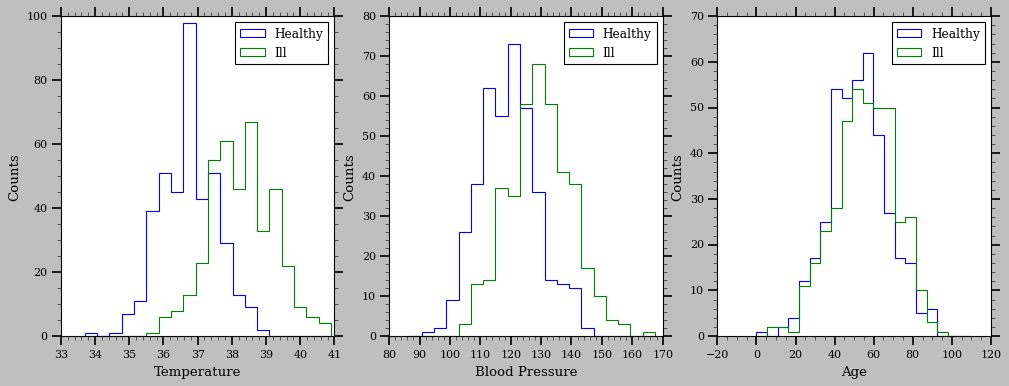

In [529]:
# Plot the 3 distributions in three subplots
fig1, ax1 = plt.subplots(1, 3, figsize=(15, 5))

Nbins = 20
# Plot the temperature distribution
temp_bin_wid , temp_range = bins_create(temp, Nbins)


ax1[0].hist(temp_healthy, bins=Nbins, range=temp_range, histtype='step', label='Healthy')
ax1[0].hist(temp_ill, bins=Nbins, range=temp_range, histtype='step', label='Ill')
ax1[0].set_xlabel('Temperature')
ax1[0].set_ylabel('Counts')
ax1[0].legend()

# Plot the blood pressure distribution
blp_bin_wid , blp_range = bins_create(blp, Nbins)
ax1[1].hist(blp_healthy, bins=Nbins, range=blp_range, histtype='step', label='Healthy')
ax1[1].hist(blp_ill, bins=Nbins, range=blp_range, histtype='step', label='Ill')
ax1[1].set_xlabel('Blood Pressure')
ax1[1].set_ylabel('Counts')
ax1[1].legend()

# Plot the age distribution
age_bin_wid , age_range = bins_create(age, Nbins)
ax1[2].hist(age_healthy, bins=Nbins, range=age_range, histtype='step', label='Healthy')
ax1[2].hist(age_ill, bins=Nbins, range=age_range, histtype='step', label='Ill')
ax1[2].set_xlabel('Age')
ax1[2].set_ylabel('Counts')
ax1[2].legend()


fig1.savefig('Figures/Anorocdist.png')




In [530]:
till_count, till_error, till_center_bins, till_bin_width, till_datamin, till_datamax = hist_create(temp_ill, Nbins, temp_bin_wid,datamin= temp_range[0], datamax= temp_range[1])
th_count, th_error, th_center_bins, th_bin_width, th_datamin, th_datamax = hist_create(temp_healthy, Nbins, temp_bin_wid,datamin= temp_range[0], datamax= temp_range[1])

bll_count, bll_error, bll_center_bins, bll_bin_width, bll_datamin, bll_datamax = hist_create(blp_ill, Nbins, blp_bin_wid,datamin= blp_range[0], datamax= blp_range[1])
blh_count, blh_error, blh_center_bins, blh_bin_width, blh_datamin, blh_datamax = hist_create(blp_healthy, Nbins, blp_bin_wid,datamin= blp_range[0], datamax= blp_range[1])

al_count, al_error, al_center_bins, al_bin_width, al_datamin, al_datamax = hist_create(age_ill, Nbins, age_bin_wid,datamin= age_range[0], datamax= age_range[1])
ah_count, ah_error, ah_center_bins, ah_bin_width, ah_datamin, ah_datamax = hist_create(age_healthy, Nbins, age_bin_wid,datamin= age_range[0], datamax= age_range[1])

plt.close()


Temperature KS test:  KstestResult(statistic=0.3, pvalue=0.33559098126008213)
Blood Pressure KS test:  KstestResult(statistic=0.25, pvalue=0.571336004933722)
Age KS test:  KstestResult(statistic=0.05, pvalue=0.9999999999999998)


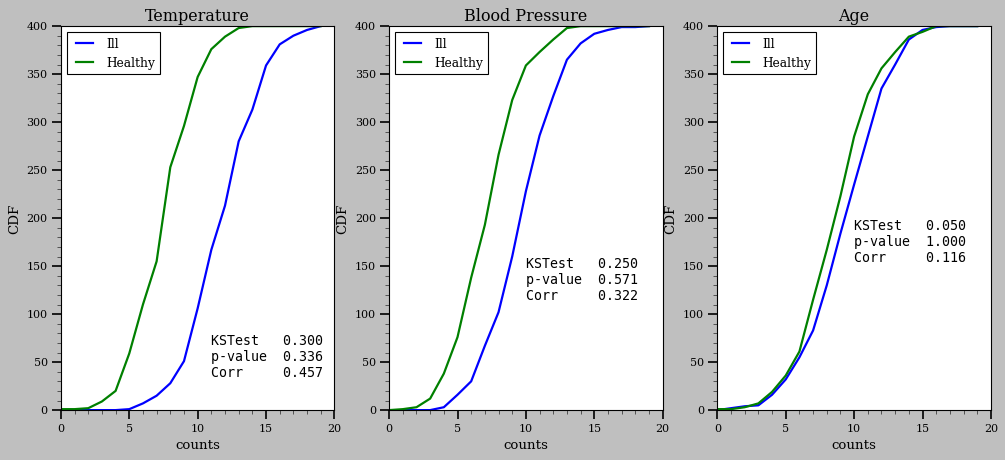

In [531]:
til_cdf = np.cumsum(plt.hist(temp_ill, bins=Nbins, range=temp_range, histtype='step', label='Healthy')[0])
th_cdf = np.cumsum(plt.hist(temp_healthy, bins=Nbins, range=temp_range, histtype='step', label='Healthy')[0])

blil_cdf = np.cumsum(plt.hist(blp_ill, bins=Nbins, range=blp_range, histtype='step', label='Healthy')[0])
blh_cdf = np.cumsum(plt.hist(blp_healthy, bins=Nbins, range=blp_range, histtype='step', label='Healthy')[0])

ail_cdf = np.cumsum(plt.hist(age_ill, bins=Nbins, range=age_range, histtype='step', label='Healthy')[0])
ah_cdf = np.cumsum(plt.hist(age_healthy, bins=Nbins, range=age_range, histtype='step', label='Healthy')[0])

plt.close()

temp_kstest = stats.ks_2samp(til_cdf, th_cdf)
blp_kstest = stats.ks_2samp(blil_cdf, blh_cdf)
age_kstest = stats.ks_2samp(ail_cdf, ah_cdf)

print('Temperature KS test: ', temp_kstest)
print('Blood Pressure KS test: ', blp_kstest)
print('Age KS test: ', age_kstest)

#Find linear correlation coefficients between the three variables and the status
corr_temp = np.corrcoef(temp, status)[0,1]
corr_blp = np.corrcoef(blp, status)[0,1]
corr_age = np.corrcoef(age, status)[0,1]

count_temp = np.arange(0, len(til_cdf), 1)
count_bl = np.arange(0, len(blil_cdf), 1)
count_age = np.arange(0, len(ail_cdf), 1)


tarray = np.linspace(temp_range[0], temp_range[1], 1000)
barray = np.linspace(blp_range[0], blp_range[1], 1000)
aarray = np.linspace(age_range[0], age_range[1], 1000)


# # Plot the 3 distributions in three subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

# remove ticks on the top and right axis
ax[0].tick_params(top=False, right=False)
ax[1].tick_params(top=False, right=False)
ax[2].tick_params(top=False , right=False)

# remove minor ticks on the top axis
ax[0].tick_params(top=False, right = False, which='minor')
ax[1].tick_params(top=False,right = False, which='minor')
ax[2].tick_params(top=False,right = False, which='minor')



ax[0].plot(count_temp, til_cdf, label='Ill')
ax[0].plot(count_temp, th_cdf, label='Healthy')
ax[0].set_xlabel('counts')
ax[0].set_ylabel('CDF')
ax[0].set_title('Temperature')
ax[0].legend(loc='upper left')

dtemp = {'KSTest': temp_kstest[0], 'p-value': temp_kstest[1], 'Corr': corr_temp}
txt_temp = nice_string_output(dtemp, extra_spacing=2, decimals=3)
add_text_to_ax(0.55, 0.2, txt_temp, ax[0])

ax[1].plot(count_bl, blil_cdf, label='Ill')
ax[1].plot(count_bl, blh_cdf, label='Healthy')
ax[1].set_xlabel('counts')
ax[1].set_ylabel('CDF')
ax[1].set_title('Blood Pressure')
ax[1].legend(loc='upper left')

dblp = {'KSTest': blp_kstest[0], 'p-value': blp_kstest[1], 'Corr': corr_blp}
txt_blp = nice_string_output(dblp, extra_spacing=2, decimals=3)
add_text_to_ax(0.5, 0.4, txt_blp, ax[1])

ax[2].plot(count_age, ail_cdf, label='Ill')
ax[2].plot(count_age, ah_cdf, label='Healthy')
ax[2].set_xlabel('counts')
ax[2].set_ylabel('CDF')
ax[2].set_title('Age')
ax[2].legend(loc='upper left')

dage = {'KSTest': age_kstest[0], 'p-value': age_kstest[1], 'Corr': corr_age}
txt_age = nice_string_output(dage, extra_spacing=2, decimals=3)
add_text_to_ax(0.5, 0.5, txt_age, ax[2])

fig.savefig('Figures/Anoroc_CDFs.png')


In [532]:
#Find linear correlation coefficients between the three variables and the status
corr_temp = np.corrcoef(temp, status)[0,1]
corr_blp = np.corrcoef(blp, status)[0,1]
corr_age = np.corrcoef(age, status)[0,1]

print('Correlation between temperature and status: ', corr_temp)
print('Correlation between blood pressure and status: ', corr_blp)
print('Correlation between age and status: ', corr_age)


Correlation between temperature and status:  0.4572891085873212
Correlation between blood pressure and status:  0.3221400450144873
Correlation between age and status:  0.11575548826663341


In [533]:
healthy_fish

array([[ 36.3, 125.7,  56.8],
       [ 35.8, 116.3,  60. ],
       [ 37.6, 142.9,  81.9],
       ...,
       [ 36.9, 114.7,  53.3],
       [ 37.6, 106.1,  39.2],
       [ 37.9, 138.7,  74.7]])

In [534]:
#Fisher discriminant
fish_ill,fish_healthy, wf = fisher_disc(healthy_fish, ill_fish)


tot_bin_width, bin_range = bins_create(np.append(fish_ill,fish_healthy), 20)



In [535]:
count_ill_fish, er_ill_fish, center_ill_fish, bin_width_ill_fish, min_ill_fish,max_ill_fish = hist_create(fish_ill,Nbins, tot_bin_width, bin_range[0], bin_range[1])
count_healthy_fish, er_healthy_fish, center_healthy_fish, bin_width_healthy_fish, min_healthy_fish,max_healthy_fish = hist_create(fish_healthy,Nbins, tot_bin_width, bin_range[0], bin_range[1])

plt.close()

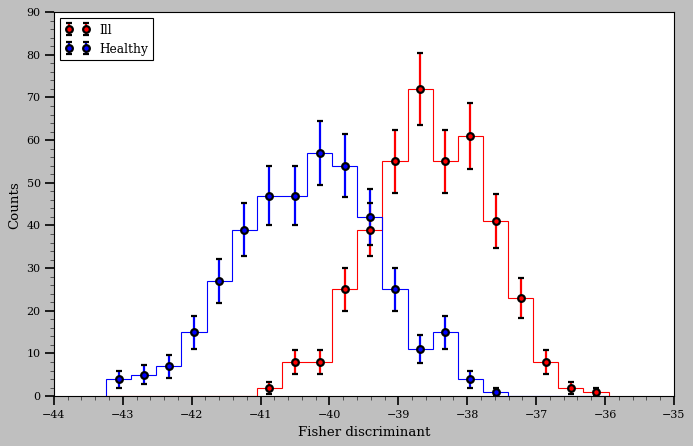

In [536]:
#plot the histograms
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# remove ticks on the top and right axis
ax.tick_params(top=False, right=False)

# remove minor ticks on the top axis
ax.tick_params(top=False, right = False, which='minor')




ax.errorbar(center_ill_fish, count_ill_fish, yerr=er_ill_fish, fmt='o', label='Ill', color='red',ms=6,mfc='red')
ax.errorbar(center_healthy_fish, count_healthy_fish, yerr=er_healthy_fish, fmt='o', label='Healthy', color='blue',ms=6,mfc='blue')

#plot the counts as histograms
ax.hist(fish_ill, bins=Nbins, range=(min_ill_fish,max_ill_fish), histtype='step', color='red')
ax.hist(fish_healthy, bins=Nbins, range=(min_healthy_fish,max_healthy_fish), histtype='step', color='blue')

ax.set_xlabel('Fisher discriminant')
ax.set_ylabel('Counts')
ax.legend(loc='upper left')

fig.savefig('Figures/Anoroc_Fisher.png')

In [537]:
print(wf)

[-0.93810394 -0.02806819 -0.01381178]


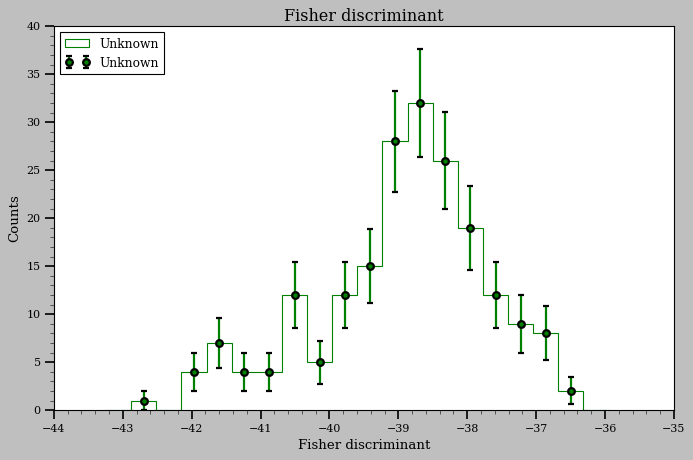

In [538]:
#apply the fisher discriminant to the unknown data
fish_unknown = np.dot(wf, unknown_var.T).T

count_unknown_fish, er_unknown_fish, center_unknown_fish, bin_width_unknown_fish, min_unknown_fish,max_unknown_fish = hist_create(fish_unknown,Nbins, tot_bin_width, bin_range[0], bin_range[1])
plt.close()

#plot the histogram of the unknown data
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# remove ticks on the top and right axis
ax.tick_params(top=False, right=False)

# remove minor ticks on the top axis
ax.tick_params(top=False, right = False, which='minor')


ax.hist(fish_unknown, bins=Nbins, range=(min_unknown_fish,max_unknown_fish), histtype='step', color='green', label='Unknown')

ax.errorbar(center_unknown_fish, count_unknown_fish, yerr=er_unknown_fish, fmt='o', label='Unknown', color='green',ms=6,mfc='green')

ax.set_xlabel('Fisher discriminant')
ax.set_ylabel('Counts')
ax.set_title('Fisher discriminant')
ax.legend(loc='upper left')


In [539]:
def double_gaussian(x, sigma, f , mu1, mu2):
    return len(status_uknown) * tot_bin_width * (f * stats.norm.pdf(x, mu1, sigma) + (1 - f) * stats.norm.pdf(x, mu2, sigma))

unbinned = UnbinnedLH(double_gaussian, fish_unknown)

dbgaus_fit = Minuit(unbinned, sigma=3, f=0.25, mu1=-41.5, mu2=-38.5)
dbgaus_fit.errordef = 0.5
dbgaus_fit.migrad()

../External_Functions\ExternalFunctions.py:183: RuntimeWarning: invalid value encountered in greater
  mask_f_positive = (f>0)


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -540.2                     │              Nfcn = 117              │
│ EDM = 6.01e-06 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ sigma │   0.86    │   0.06    │            │            │         │         │       │
│ 1 │ f     │   0.18    │   0.04    │            │            │         │         │       │
│ 2 │ mu1   │  -40.87   │   0.22    │            │            │         │         │       │
│ 3 │ mu2   │  -38.52   │   0.09    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬─────────────────────────────────────────┐
│       │     sigma         f       mu1       mu2 │
├───────┼─────────────────────────────────────────┤
│ sigma │   0.00351 -0.000737  -0.00142   -0.0018 │
│     f │ -0.000737   0.00169    0.0047   0.00169 │
│   mu1 │  -0.00142    0.0047     0.048   0.00739 │
│   mu2 │   -0.0018   0.00169   0.00739    0.0077 │
└───────┴─────────────────────────────────────────┘

In [540]:
#extract likelihood values
dbgaus_fit_values = dbgaus_fit.fval
print('Likelihood value for double gaussian fit: ', dbgaus_fit_values)

Likelihood value for double gaussian fit:  -540.2160429248713


In [541]:
def indi_gaussian(x, sigma, mu,f):
    return f*len(status_uknown) * tot_bin_width * stats.norm.pdf(x, mu, sigma)

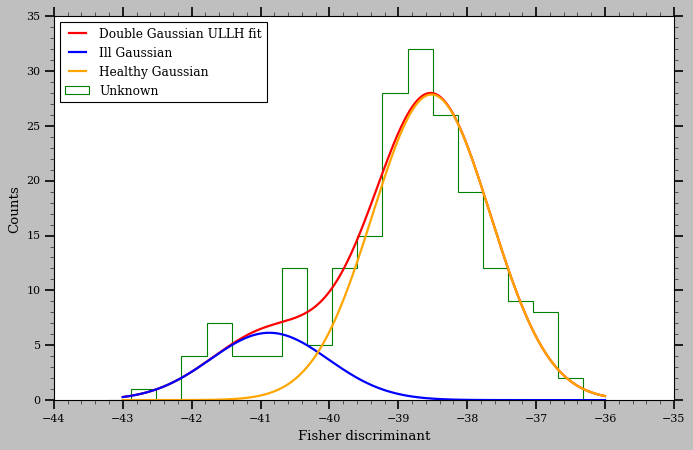

In [542]:
fish_x = np.linspace(-43,-36,1000)

fig3,ax3 = plt.subplots(1,1,figsize=(10,6))

ax3.hist(fish_unknown, bins=Nbins, range=(min_unknown_fish,max_unknown_fish), histtype='step', color='green', label='Unknown')

ax3.plot(fish_x, double_gaussian(fish_x, *dbgaus_fit.values), color='red', label='Double Gaussian ULLH fit')

ax3.plot(fish_x, indi_gaussian(fish_x, dbgaus_fit.values['sigma'], dbgaus_fit.values['mu1'], dbgaus_fit.values['f']), color='blue', label='Ill Gaussian')

ax3.plot(fish_x, indi_gaussian(fish_x, dbgaus_fit.values['sigma'], dbgaus_fit.values['mu2'], 1-dbgaus_fit.values['f']), color='orange', label='Healthy Gaussian')


ax3.set_xlabel('Fisher discriminant')
ax3.set_ylabel('Counts')
ax3.legend(loc='upper left')

In [543]:
def single_gaussian(x, sigma, mu):
    return len(status_uknown) * tot_bin_width * stats.norm.pdf(x, mu, sigma)

unbinned_sn = UnbinnedLH(single_gaussian, fish_unknown)

sngaus_fit = Minuit(unbinned_sn, sigma=3, mu=-39.5)
sngaus_fit.errordef = 0.5
sngaus_fit.migrad()



#extract likelihood values


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -530.1                     │              Nfcn = 55               │
│ EDM = 1.88e-05 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ sigma │   1.25    │   0.06    │            │            │         │         │       │
│ 1 │ mu    │  -38.94   │   0.09    │            │            │         │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───────┬───────────────────┐
│       │    sigma       mu │
├───────┼───────────────────┤
│ sigma │  0.00388 5.45e-06 │
│    mu │ 5.45e-06  0.00776 │
└───────┴───────────────────┘

Likelihood value for single gaussian fit:  -530.1427878843942
Likelihood ratio test statistic:  0.03764551534843772


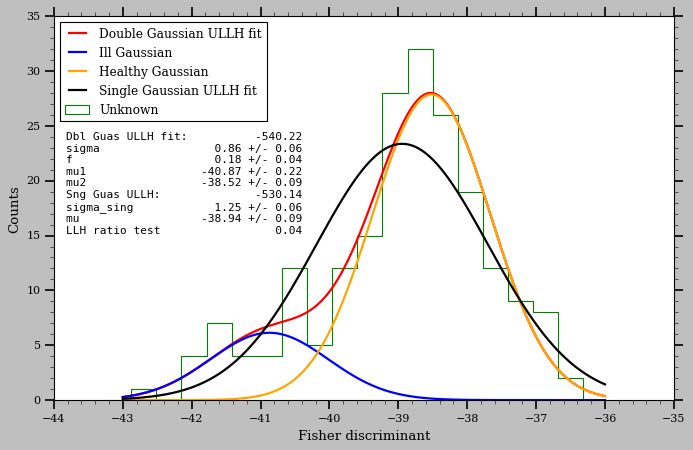

In [544]:
sngaus_fit_values = sngaus_fit.fval
print('Likelihood value for single gaussian fit: ', sngaus_fit_values)

D  = -2*np.log(sngaus_fit_values/dbgaus_fit_values)
print('Likelihood ratio test statistic: ', D)


ax3.plot(fish_x, single_gaussian(fish_x, *sngaus_fit.values), color='black', label='Single Gaussian ULLH fit')
ax3.legend(loc='upper left')

d_tot_doub = {"Dbl Guas ULLH fit:" :dbgaus_fit_values,	
            'sigma' : [dbgaus_fit.values['sigma'], dbgaus_fit.errors['sigma']],
                'f' : [dbgaus_fit.values['f'], dbgaus_fit.errors['f']],
                'mu1' : [dbgaus_fit.values['mu1'], dbgaus_fit.errors['mu1']],
                'mu2' : [dbgaus_fit.values['mu2'], dbgaus_fit.errors['mu2']],
                'Sng Guas ULLH:' : sngaus_fit_values,
                'sigma_sing' : [sngaus_fit.values['sigma'], sngaus_fit.errors['sigma']],
                'mu' : [sngaus_fit.values['mu'], sngaus_fit.errors['mu']],
                'LLH ratio test' : D}

tot_txt_doub = nice_string_output(d_tot_doub, extra_spacing=2, decimals=2)
add_text_to_ax(0.02, 0.70, tot_txt_doub, ax3, fontsize=10)

fig3
# fig3.savefig('Figures/LLH_fits.png')

In [551]:
#Calculate The fraction between the areas underneath the ill gaussian and the healthy gaussian
A_f = np.sum(indi_gaussian(fish_x, dbgaus_fit.values['sigma'], dbgaus_fit.values['mu1'], dbgaus_fit.values['f']))/np.sum(double_gaussian(fish_x, *dbgaus_fit.values))
print('Fraction of ill fish: ', A_f)

#The amount of ill people in the unknown data set
N_ill = A_f*len(status_uknown)
N_ill_err = 1-(1-A_f)**200
print('Number of ill fish: ', N_ill, ' +/- ', N_ill_err)


Fraction of ill fish:  0.17984682944946354
Number of ill fish:  35.96936588989271  +/-  1.0


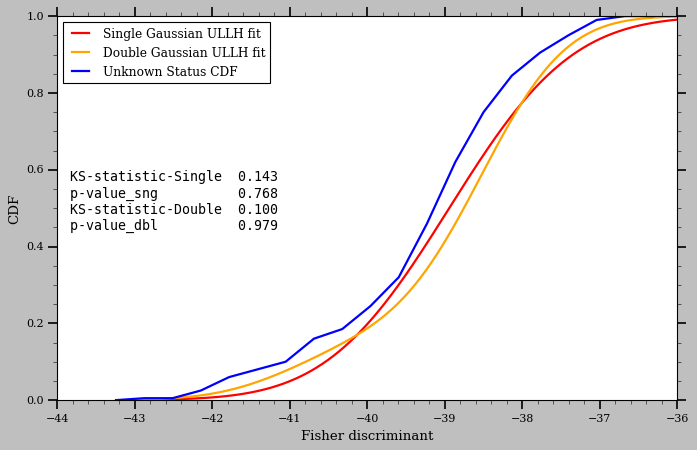

In [ ]:
# Find CDF of the single gaussian fit
cdf_sng_gaus = stats.norm.cdf(fish_x, sngaus_fit.values['mu'], sngaus_fit.values['sigma'])

cdf_dbl_gaus = stats.norm.cdf(fish_x, dbgaus_fit.values['mu1'], dbgaus_fit.values['sigma']) * dbgaus_fit.values['f'] + stats.norm.cdf(fish_x, dbgaus_fit.values['mu2'], dbgaus_fit.values['sigma']) * (1 - dbgaus_fit.values['f'])

cdf_unknown = (np.cumsum(plt.hist(fish_unknown, bins=Nbins, range=(bin_range[0],bin_range[1]),density=True, histtype='step', color='green', label='Unknown')[0]*tot_bin_width))
plt.close()

sing_kstest = stats.kstest(cdf_unknown, cdf_sng_gaus)
dbl_kstest = stats.kstest(cdf_unknown, cdf_dbl_gaus)

fig4,ax4 = plt.subplots(1,1,figsize=(10,6))

ax4.plot(fish_x, cdf_sng_gaus, color='red', label='Single Gaussian ULLH fit')
ax4.plot(fish_x, cdf_dbl_gaus, color='orange', label='Double Gaussian ULLH fit')
ax4.plot(np.arange(bin_range[0],bin_range[1],tot_bin_width), cdf_unknown, color='blue', label='Unknown Status CDF')


d_cdf = {'KS-statistic-Single': sing_kstest[0], 'p-value_sng': sing_kstest[1]
        ,'KS-statistic-Double': dbl_kstest[0], 'p-value_dbl': dbl_kstest[1]}

text_cdf = nice_string_output(d_cdf, extra_spacing=2, decimals=3)
add_text_to_ax(0.02, 0.6, text_cdf, ax4, fontsize=12)

ax4.legend(loc='upper left')

ax4.set_xlabel('Fisher discriminant')
ax4.set_ylabel('CDF')

fig4.savefig('Figures/LLH_CDF.png')


In [ ]:
FPR, TPR = roc_curve(fish_ill, fish_healthy, bin_range,Nbins)

#Number 

20

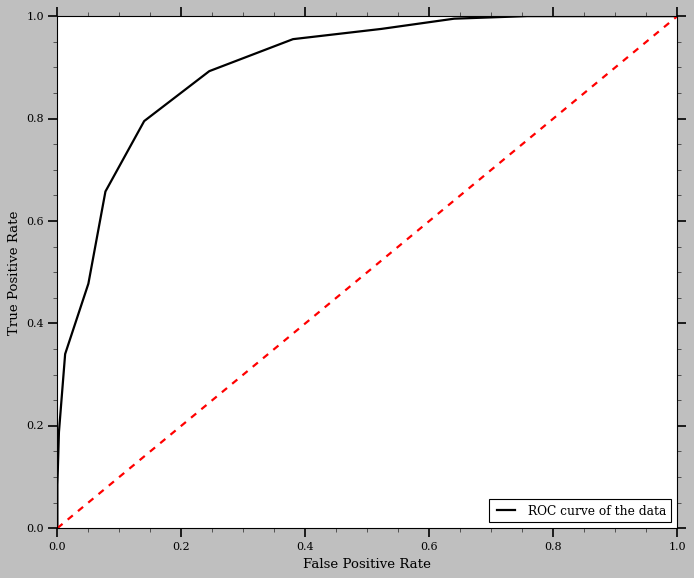

In [552]:


plt.plot(FPR, TPR, color='Black', lw=2, label='ROC curve of the data')

#plot diagonal line
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

plt.savefig('Figures/ROC_curve_Fish.png')